

# Generate statistics about mapping between attractors in one period and attractors in another period 

Apr 8, 2018 

Sam Goldman



In [2]:
import sys
import os
sys.path.append("../Classes")
from HomGraph import *
from SFGraph import *
from sighelp import *

from AttractorGraph import * 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import pickle

import time



# This sets reasonable defaults for font size for
# a figure that will go in a paper


from matplotlib import rcParams
sns.set(context='paper',font_scale = 7,
        rc = {'figure.figsize' : (20,10), 'legend.frameon':True, 
              'legend.loc': 'upper right', "xtick.major.size": 10,"ytick.major.size": 10,
             "xtick.minor.size": 6,"ytick.minor.size": 6, 
              "xtick.major.width": 3, "ytick.major.width": 3,
             "xtick.minor.width": 1, "ytick.minor.width": 1})

# sns.set_style("white")
sns.set_style("ticks")





In [2]:
'''
    For debugging
'''
if "AttractorGraph" in sys.modules:
    del sys.modules['AttractorGraph']
from AttractorGraph import * 

## Visualizing the mapping

In [21]:
n = 1000
gam = 2.0
my_graph = SFGraph(n, gam)
# my_graph = Graph.load_graph(state_file="/Users/Sam/Documents/Harvard/Research/Results/Oscillating/Oscillating Attractors/Phase Shift/n1000gam2largebasins_state.npy", graph_file="/Users/Sam/Documents/Harvard/Research/Results/Oscillating/Oscillating Attractors/Phase Shift/n1000gam2largebasins_graph.npy")

# Get hub... 
hub_node = my_graph.find_hub()

attr_graph = AttractorGraph(graph=my_graph, oscil_node=hub_node)




In [22]:
attr_graph = AttractorGraph(graph=my_graph, oscil_node=hub_node)
attr_graph.cross_compare_attrs(per1=4, per2=10, t=2000, trials=10, attr_cutoff=20, explore_null=False)
attr_graph.pretty_print()


Periods explored:  ['4', '10']
Period:  4
Number of attractors explored:  44
Size of each attractor:  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Number of nodes in each basin:  [26, 139, 99, 22, 24, 20, 69, 27, 41, 73, 51, 53, 22, 26, 32, 26, 24, 22, 51, 53, 51, 27, 20, 24, 24, 53, 77, 53, 46, 45, 24, 19, 77, 53, 32, 22, 26, 22, 24, 26, 24, 51, 53, 51]
-----------------
Period:  10
Number of attractors explored:  35
Size of each attractor:  [10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20]
Number of nodes in each basin:  [78, 111, 83, 57, 37, 82, 27, 32, 314, 78, 51, 37, 34, 28, 57, 32, 51, 51, 30, 32, 55, 51, 214, 33, 70, 32, 37, 51, 50, 37, 32, 32, 28, 40, 53]
-----------------


In [23]:
attr_graph.check_attr_parsimony(10, 4),attr_graph.check_attr_parsimony(4, 10)

([1.0,
  0.65,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.4,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.4,
  0.4,
  1.0,
  1.0],
 [0.625,
  0.5,
  0.375,
  1.0,
  1.0,
  0.5,
  1.0,
  1.0,
  0.875,
  1.0,
  1.0,
  0.875,
  0.875,
  0.875,
  1.0,
  0.625,
  0.625,
  0.625,
  0.375,
  1.0])

In [24]:
attr_graph.export_bipartite(outfile="/Users/Sam/Desktop/bipartite_gam_2.0_4_10_bad", per1='4', per2='10')

This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
This node is in multiple attractors!
T

In [20]:
my_graph.save_graph(file_name_prefix="/Users/Sam/Desktop/SFGraphN=1000Gamma=1.8Good_mapping_more_attrs")

Visualizing the mapping for a controlled example

Here we try to go between an attractor landscape for input period $T_1$ to input period $T_2$, but we go between tehse periods for two separate networks, $G_1$ and $G_2$.  Thus, there should be no bijection.  

In [123]:
hub_index = 50
n = 1000 
gam = 2.5 
per1 = 4
per2 = 6
t = 1000
trials=10
attr_cutoff=50


test_graph1 = SFGraph(n, gam)#SFGraph(n, gam)
test_graph2 = SFGraph(n, gam)#SFGraph(n, gam)
hub_node1 = test_graph1.find_hub(hub_number=hub_index)
hub_node2 = test_graph2.find_hub(hub_number=hub_index)
attr_graph1 = AttractorGraph(graph=test_graph1, oscil_node=hub_node1)
attr_graph2 = AttractorGraph(graph=test_graph2, oscil_node=hub_node2)
AttractorGraph.cross_compare_attrs_ctrl(attr_graph1 = attr_graph1, attr_graph2 = attr_graph2,
                                    per1=per1, per2=per2, t=t, trials=trials, explore_null=False, attr_cutoff=attr_cutoff)



In [11]:
attr_graph1.pretty_print()
attr_graph2.pretty_print()

NameError: name 'attr_graph1' is not defined

In [124]:
np.mean(AttractorGraph.check_attr_parsimony_ctrl(attr_graph1=attr_graph1, attr_graph2=attr_graph2, test_per=4, target_per =6))

0.95

In [125]:
AttractorGraph.export_bipartite_multigraph(graph1=attr_graph1, graph2=attr_graph2, outfile="/Users/Sam/Desktop/test", per1='4', per2='6')

# Finding average agreement or bijectiveness between two different modes
This has been abstracted into scripts...

## In this case, we consider overlap between attractors from one landscape to the basin in the other landscape

Procedurally, take some attractor cycle from the landscape of input oscillation $T_1$.  Now check each network state in this cycle, $A_j$, and find where they end up in attractor landscape for input oscillation $T_2$.  Specifically, find the basin in $T_2$ that contains the most of these networks tates from cycle $A_j$.  Then calculate the size of this intersection from $A_j$ and $Basin(B_i)$... Normalize by number of states in attractor cycle of $A_j$, then average over all attractors we sampled 

In [61]:
with open("../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/mapping_sf_graph_4_6_hub_0_overlap_False.p", "rb") as fp: 
    params, results = pickle.load(fp)


In [62]:
params, results.keys()

({'attr_cutoff': 20,
  'gammas': array([1.72      , 1.79416667, 1.86833333, 1.9425    , 2.01666667,
         2.09083333, 2.165     , 2.23916667, 2.31333333, 2.3875    ,
         2.46166667, 2.53583333, 2.61      , 2.68416667, 2.75833333,
         2.8325    , 2.90666667, 2.98083333, 3.055     , 3.12916667,
         3.20333333, 3.2775    , 3.35166667, 3.42583333, 3.5       ]),
  'graph_type': 'sf_graph',
  'hub_index': 0,
  'n': 1000,
  'per1': 4,
  'per2': 6,
  'r': 20,
  'remove_overlap': False,
  't_max': 20000,
  't_start': 50,
  'trials': 20},
 dict_keys(['per1_to_per2', 'per2_to_per1', 'per1_to_per2_var', 'per2_to_per1_var']))

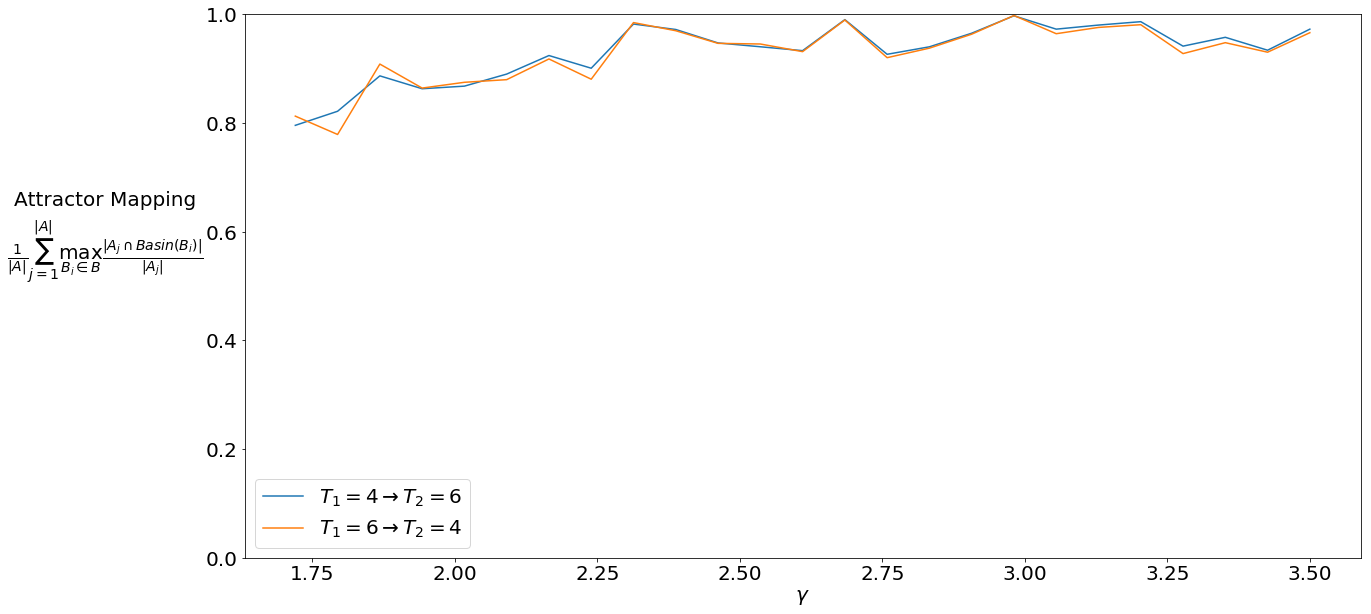

In [63]:
gammas = params['gammas']
per1_to_per2 = results['per1_to_per2']
per2_to_per1 = results['per2_to_per1']
per1 = params['per1']
per2 = params['per2']
plt.plot(gammas, per1_to_per2, label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$")
plt.plot(gammas, per2_to_per1,  label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$")
# plt.xlabel(r"$\gamma$")
plt.ylabel("Attractor Mapping\n" + r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B} \frac{|A_j \cap Basin(B_i)|}{|A_j|}$", 
          rotation=0, labelpad=100)
# h.set_rotation(0)
plt.xlabel(r"$\gamma$")
plt.ylim([0,1])
plt.legend()
plt.show()

## Homgraph adjusted metric..

In [15]:
with open("../../Results/Oscillating/Oscillating Attractors/Mapping/Homogeneous/mapping_hom_graph_4_6_hub_0_overlap_True.p", "rb") as fp: 
    params, results = pickle.load(fp)
    
    

In [16]:
ks_temp = params['gammas']
per1_to_per2 = results['per1_to_per2']
per2_to_per1 = results['per2_to_per1']
per1 = params['per1']
per2 = params['per2']

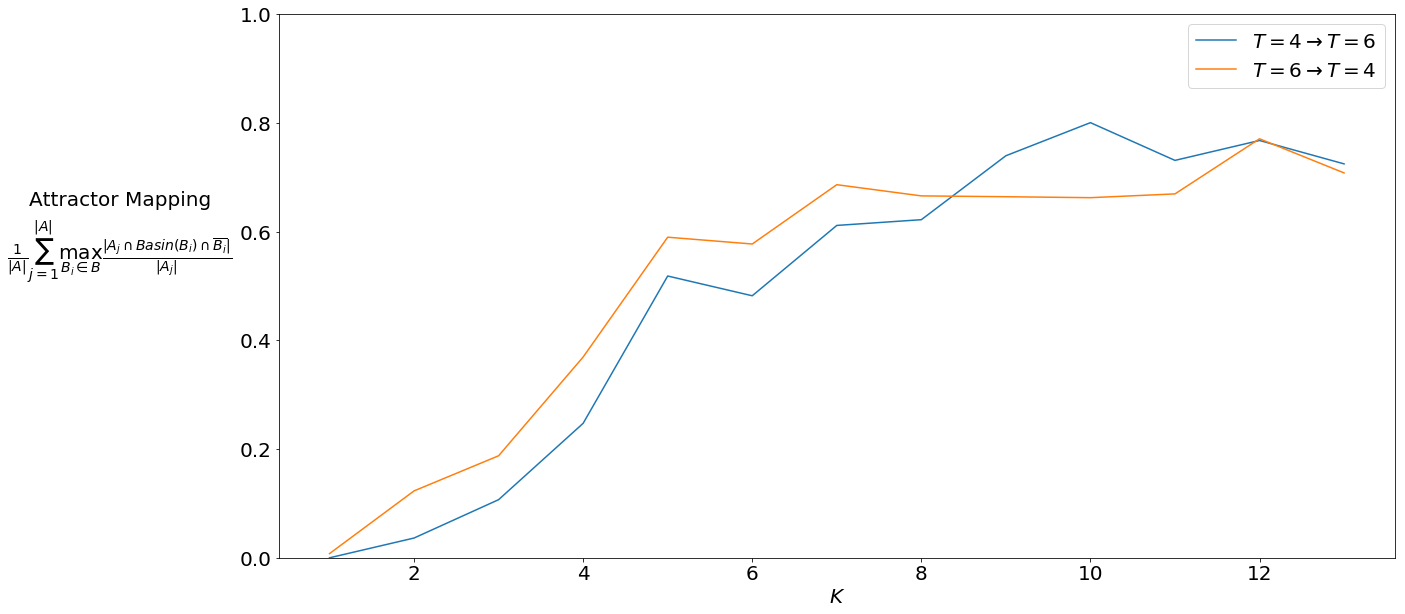

In [27]:
plt.plot(ks_temp, per1_to_per2, label=r"$T=" + f"{per1}" + r"\rightarrow T=" + f"{per2}" + r"$")
plt.plot(ks_temp, per2_to_per1,  label=r"$T=" + f"{per2}" + r"\rightarrow T=" + f"{per1}" + r"$")
# plt.xlabel(r"$\gamma$")
plt.ylabel("Attractor Mapping\n" + 
           r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
          rotation=0, labelpad=120)
# h.set_rotation(0)
plt.xlabel(r"$K$")
plt.legend()
plt.ylim([0,1])
plt.show()

## Try with non-hub node and combining multiple graphs
## Combining multiple graphs

In [42]:
with open("../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/mapping_sf_graph_4_6_hub_50_overlap_True.p", "rb") as fp: 
    params, results_50 = pickle.load(fp)


gammas = params['gammas']
per1_to_per2_50 = results_50['per1_to_per2']
per2_to_per1_50 = results_50['per2_to_per1']
per1 = params['per1']
per2 = params['per2']

In [43]:
len(per2_to_per1)

25

In [44]:
with open("../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/mapping_sf_graph_4_6_hub_0_overlap_True.p", "rb") as fp: 
    params, results_0 = pickle.load(fp)


gammas = params['gammas']
per1_to_per2 = results_0['per1_to_per2']
per2_to_per1 = results_0['per2_to_per1']
per1 = params['per1']
per2 = params['per2']

In [46]:
per1 = 4
per2 = 6

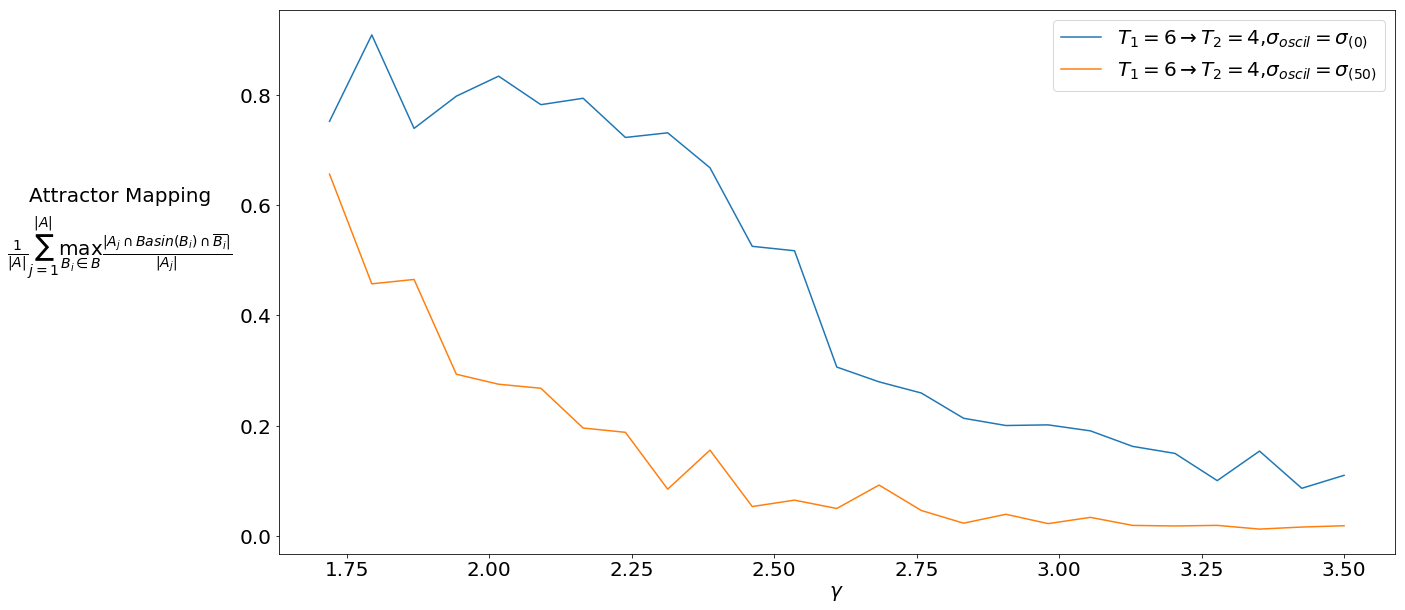

In [49]:
plt.plot(gammas, per2_to_per1, label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")
plt.plot(gammas, per2_to_per1_50, label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")
# plt.plot(gammas_100, per2_to_per1_100, label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(100)}$")

# plt.xlabel(r"$\gamma$")
plt.ylabel("Attractor Mapping\n" + 
           r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
          rotation=0, labelpad=120)

# h.set_rotation(0)
plt.xlabel(r"$\gamma$")
plt.legend()
plt.show()

Mapping attractors is not nearly as effective because random shot is that they're pretty good...if there isn't much change from node to node in the attractor, it's possible a second network will have an equal structure

## With controls

### Repeated experiment in script with parameters - now plotting

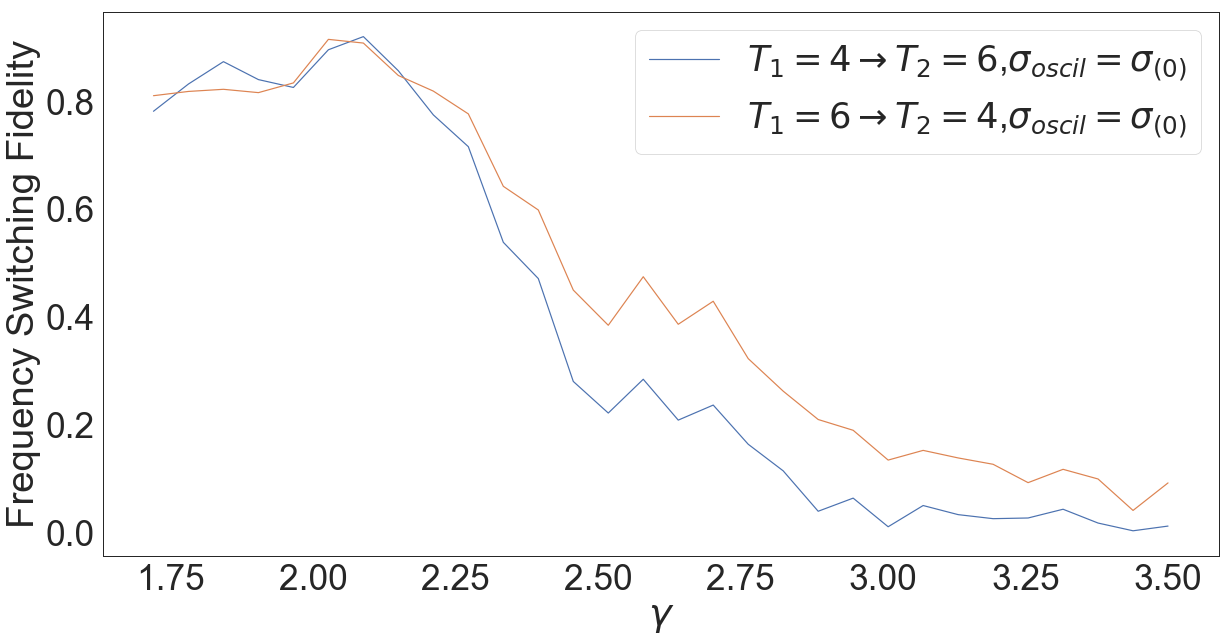

In [11]:
prefix = "../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/"

f1 = prefix + "mapping_sf_graph_4_6_hub_0_overlap_True.p"
f2 = prefix + "mapping_sf_graph_4_6_hub_0_overlap_True_CTRL.p"

with open(f1, "rb") as k: 
    params_test,results = pickle.load(k)
    
with open(f2, "rb") as q: 
    params_control, results_ctrl = pickle.load(q)
    
params_test

per1 = params_test['per1']
per2 = params_test['per2']
# plt.errorbar(params_test['gammas'], results['per1_to_per2'], 
#              yerr=np.sqrt(results['per1_to_per2_var']), 
#              label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per1_to_per2'], 
#              yerr=np.sqrt(results_ctrl['per1_to_per2_var']), 
#              label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_test['gammas'], results['per2_to_per1'], 
#              yerr=np.sqrt(results['per2_to_per1_var']), 
#              label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per2_to_per1'], 
#              yerr=np.sqrt(results_ctrl['per2_to_per1_var']), 
#              label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

### Normal plots
plt.plot(params_test['gammas'], results['per1_to_per2'], 
             label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

plt.plot(params_test['gammas'], results['per2_to_per1'], 
             label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.plot(params_control['gammas'], results_ctrl['per1_to_per2'],  
#              label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.plot(params_control['gammas'], results_ctrl['per2_to_per1'], 
#              label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")


plt.ylabel("Frequency Switching Fidelity")
# plt.ylabel("Attractor Mapping Fidelity" + 
#            r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
#           rotation=90)#, labelpad=10)

# h.set_rotation(0)
plt.xlabel(r"$\gamma$")


plt.legend()
plt.show()



In [26]:
prefix = "../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/"

f1 = prefix + "mapping_sf_graph_6_22_hub_0_overlap_True.p"
f2 = prefix + "mapping_sf_graph_6_22_hub_0_overlap_True_CTRL.p"

with open(f1, "rb") as k: 
    params_test,results = pickle.load(k)
    
with open(f2, "rb") as q: 
    params_control, results_ctrl = pickle.load(q)
    
    



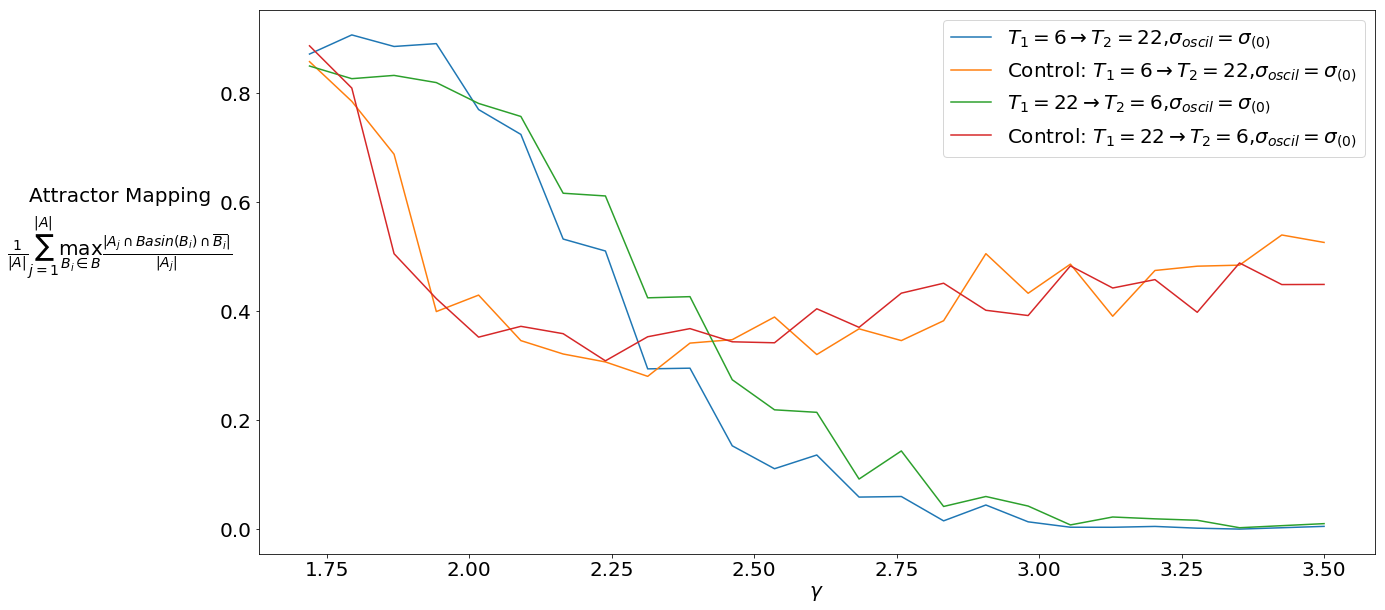

In [27]:
per1 = params_test['per1']
per2 = params_test['per2']
# plt.errorbar(params_test['gammas'], results['per1_to_per2'], 
#              yerr=np.sqrt(results['per1_to_per2_var']), 
#              label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per1_to_per2'], 
#              yerr=np.sqrt(results_ctrl['per1_to_per2_var']), 
#              label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_test['gammas'], results['per2_to_per1'], 
#              yerr=np.sqrt(results['per2_to_per1_var']), 
#              label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per2_to_per1'], 
#              yerr=np.sqrt(results_ctrl['per2_to_per1_var']), 
#              label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

### Normal plots
plt.plot(params_test['gammas'], results['per1_to_per2'], 
             label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

plt.plot(params_control['gammas'], results_ctrl['per1_to_per2'],  
             label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

plt.plot(params_test['gammas'], results['per2_to_per1'], 
             label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

plt.plot(params_control['gammas'], results_ctrl['per2_to_per1'], 
             label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

plt.ylabel("Attractor Mapping\n" + 
           r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
          rotation=0, labelpad=100)

# h.set_rotation(0)
plt.xlabel(r"$\gamma$")


plt.legend()
plt.show()




In [16]:
params_test

{'attr_cutoff': 20,
 'gammas': array([1.72      , 1.79416667, 1.86833333, 1.9425    , 2.01666667,
        2.09083333, 2.165     , 2.23916667, 2.31333333, 2.3875    ,
        2.46166667, 2.53583333, 2.61      , 2.68416667, 2.75833333,
        2.8325    , 2.90666667, 2.98083333, 3.055     , 3.12916667,
        3.20333333, 3.2775    , 3.35166667, 3.42583333, 3.5       ]),
 'hub_index': 50,
 'n': 1000,
 'per1': 4,
 'per2': 6,
 'r': 20,
 't_max': 20000,
 't_start': 50,
 'trials': 20}

__This is very troubling.. for some reason, when we try to slide the hub node in the control network example, we get a very high mapping score__

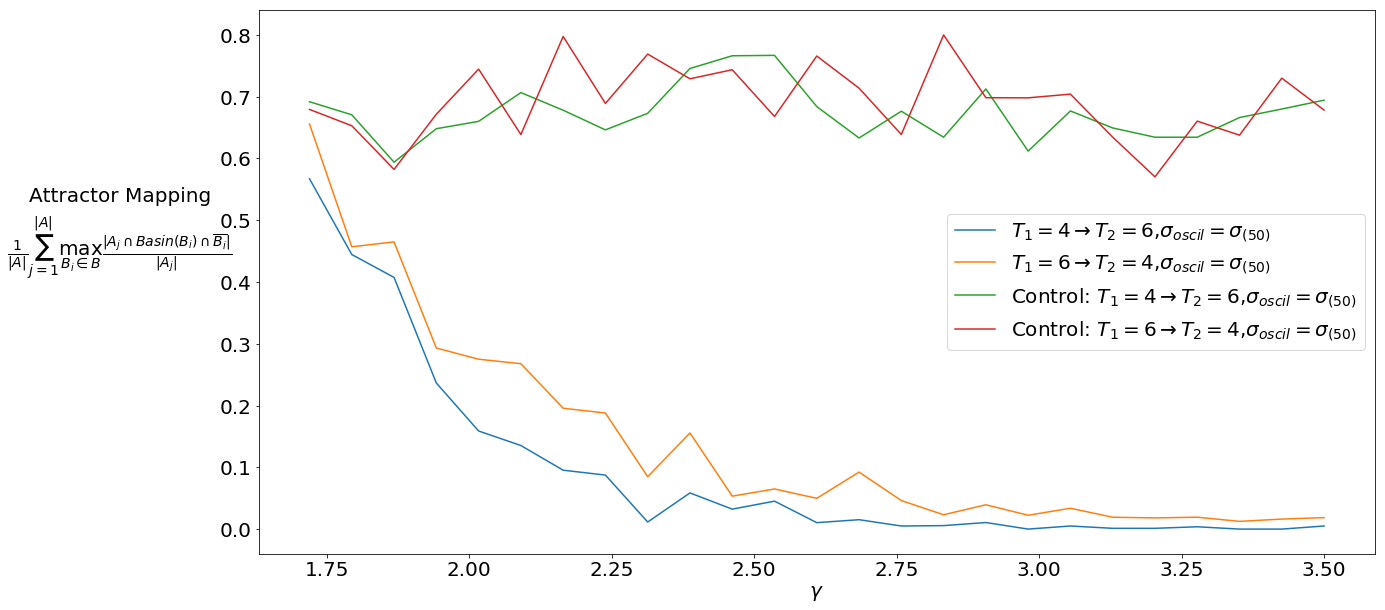

In [58]:
prefix = "../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/"

f1 = prefix + "mapping_sf_graph_4_6_hub_50_overlap_True.p"
f2 = prefix + "mapping_sf_graph_4_6_hub_50_overlap_True_CTRL.p"

with open(f1, "rb") as k: 
    params_test,results = pickle.load(k)
    
with open(f2, "rb") as q: 
    params_control, results_ctrl = pickle.load(q)
    
    

per1 = params_test['per1']
per2 = params_test['per2']
hub_index = params_test['hub_index']
# plt.errorbar(params_test['gammas'], results['per1_to_per2'], 
#              yerr=np.sqrt(results['per1_to_per2_var']), 
#              label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per1_to_per2'], 
#              yerr=np.sqrt(results_ctrl['per1_to_per2_var']), 
#              label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")

# plt.errorbar(params_test['gammas'], results['per2_to_per1'], 
#              yerr=np.sqrt(results['per2_to_per1_var']), 
#              label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per2_to_per1'], 
#              yerr=np.sqrt(results_ctrl['per2_to_per1_var']), 
#              label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")

### Normal plots
plt.plot(params_test['gammas'], results['per1_to_per2'], 
             label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")


plt.plot(params_test['gammas'], results['per2_to_per1'], 
             label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")



plt.plot(params_control['gammas'], results_ctrl['per1_to_per2'],  
             label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")


plt.plot(params_control['gammas'], results_ctrl['per2_to_per1'], 
             label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(50)}$")



plt.ylabel("Attractor Mapping\n" + 
           r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
          rotation=0, labelpad=100)

# h.set_rotation(0)
plt.xlabel(r"$\gamma$")


plt.legend()
plt.show()






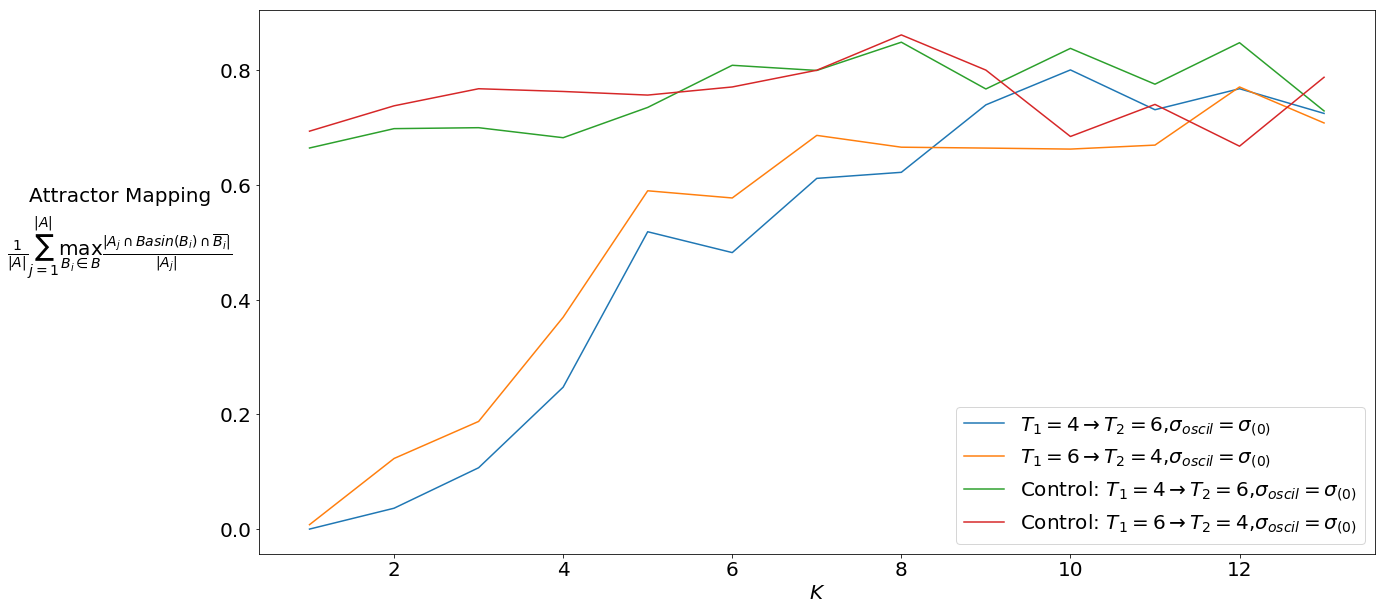

In [60]:
prefix = "../../Results/Oscillating/Oscillating Attractors/Mapping/Homogeneous/"

f1 = prefix + "mapping_hom_graph_4_6_hub_0_overlap_True.p"
f2 = prefix + "mapping_hom_graph_4_6_hub_0_overlap_True_CTRL.p"

with open(f1, "rb") as k: 
    params_test,results = pickle.load(k)
    
with open(f2, "rb") as q: 
    params_control, results_ctrl = pickle.load(q)
    
    

per1 = params_test['per1']
per2 = params_test['per2']
hub_index = params_test['hub_index']
# plt.errorbar(params_test['gammas'], results['per1_to_per2'], 
#              yerr=np.sqrt(results['per1_to_per2_var']), 
#              label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per1_to_per2'], 
#              yerr=np.sqrt(results_ctrl['per1_to_per2_var']), 
#              label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_test['gammas'], results['per2_to_per1'], 
#              yerr=np.sqrt(results['per2_to_per1_var']), 
#              label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.errorbar(params_control['gammas'], results_ctrl['per2_to_per1'], 
#              yerr=np.sqrt(results_ctrl['per2_to_per1_var']), 
#              label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

### Normal plots
plt.plot(params_test['gammas'], results['per1_to_per2'], 
             label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")


plt.plot(params_test['gammas'], results['per2_to_per1'], 
             label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")



plt.plot(params_control['gammas'], results_ctrl['per1_to_per2'],  
             label=r"Control: $T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")


plt.plot(params_control['gammas'], results_ctrl['per2_to_per1'], 
             label=r"Control: $T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")



plt.ylabel("Attractor Mapping\n" + 
           r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
          rotation=0, labelpad=100)

# h.set_rotation(0)
plt.xlabel(r"$K$")


plt.legend()
plt.show()







### Sept 20, 2018 Attractors...

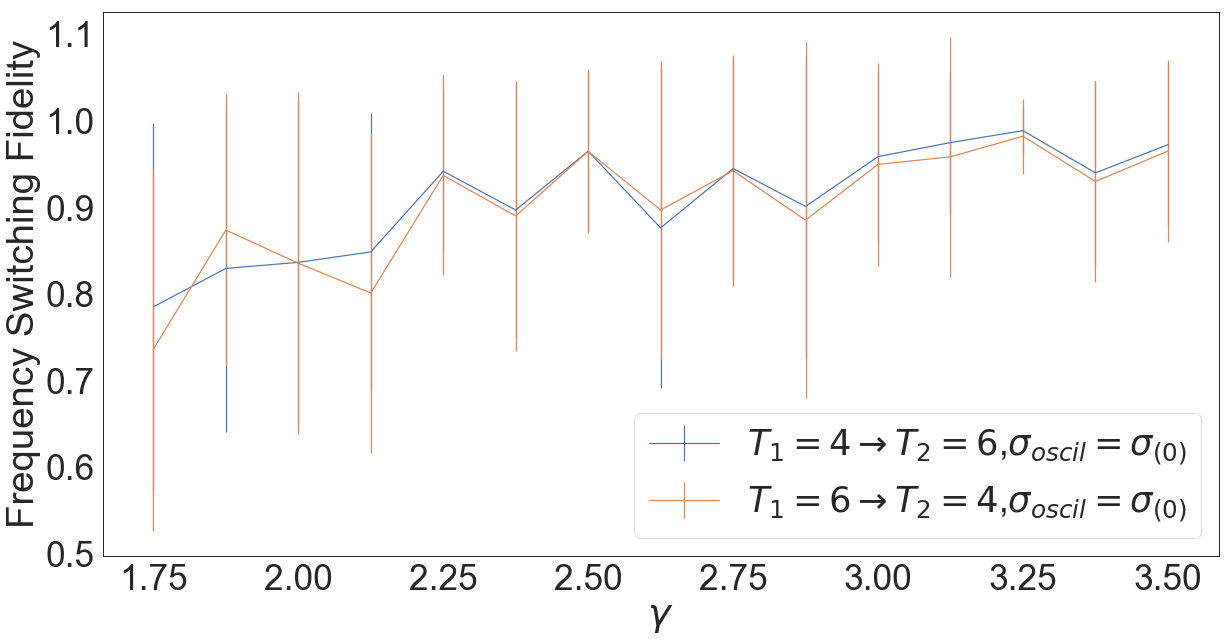

In [4]:
prefix = "../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/Split Overlap/"

f1 = prefix + "mapping_sf_graph_4_6_hub_0_overlap_False.p"

with open(f1, "rb") as k: 
    params_test,results = pickle.load(k)
    
params_test

per1 = params_test['per1']
per2 = params_test['per2']
plt.errorbar(params_test['gammas'], results['per1_to_per2_agreement'], 
             yerr=np.sqrt(results['per1_to_per2_agreement_var']), 
             label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

plt.errorbar(params_test['gammas'], results['per2_to_per1_agreement'], 
             yerr=np.sqrt(results['per2_to_per1_agreement_var']), 
             label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

### Normal plots
# plt.plot(params_test['gammas'], results['per1_to_per2_agreement'], 
#              label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.plot(params_test['gammas'], results['per2_to_per1_agreement'], 
#              label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")


plt.ylabel("Frequency Switching Fidelity")
# plt.ylabel("Attractor Mapping Fidelity" + 
#            r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
#           rotation=90)#, labelpad=10)

# h.set_rotation(0)
plt.xlabel(r"$\gamma$")


plt.legend(loc='lower right')
plt.show()

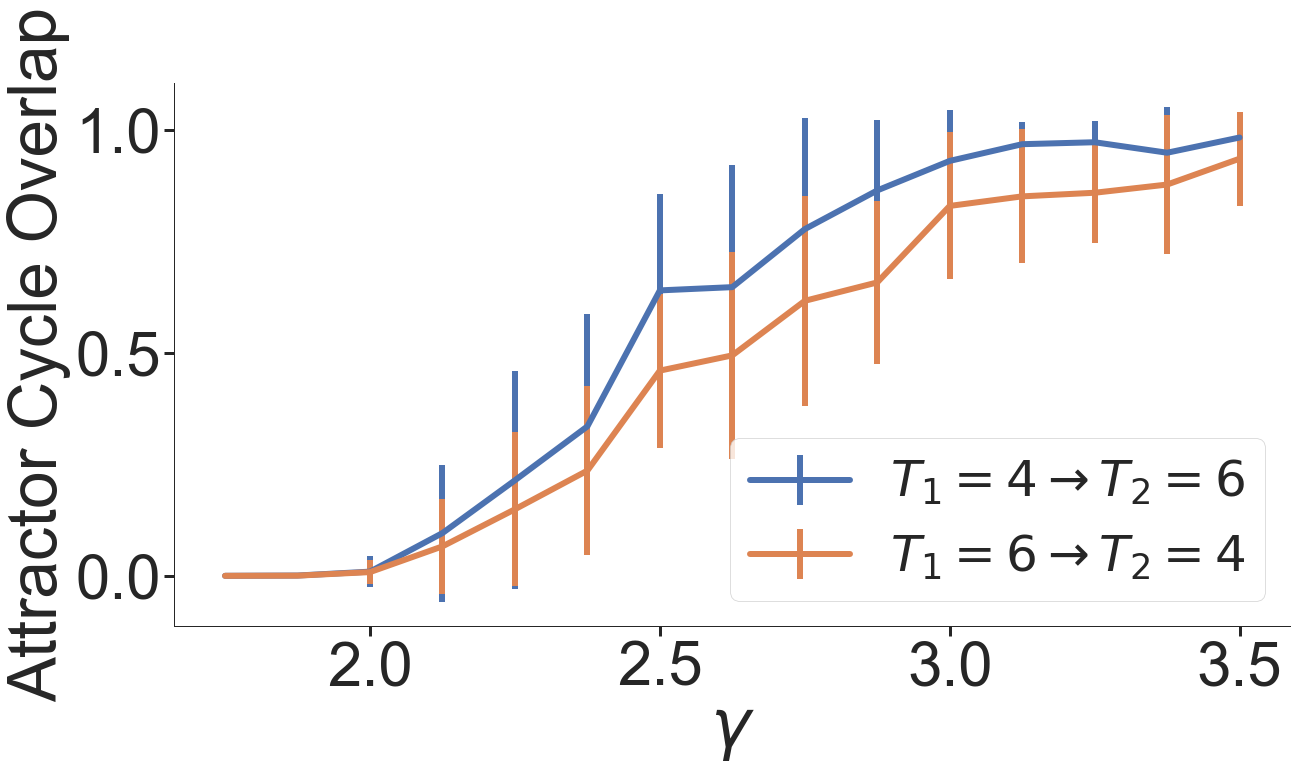

In [6]:
prefix = "../../Results/Oscillating/Oscillating Attractors/Mapping/AttrMapping/Split Overlap/"

f1 = prefix + "mapping_sf_graph_4_6_hub_0_overlap_False.p"

with open(f1, "rb") as k: 
    params_test,results = pickle.load(k)
    
params_test

per1 = params_test['per1']
per2 = params_test['per2']
plt.errorbar(params_test['gammas'], results['per1_to_per2_overlap'], 
             yerr=np.sqrt(results['per1_to_per2_overlap_var']), linewidth=6, 
             label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$") #+ r",$\sigma_{oscil}=\sigma_{(0)}$")

plt.errorbar(params_test['gammas'], results['per2_to_per1_overlap'], 
             yerr=np.sqrt(results['per2_to_per1_overlap_var']), linewidth=6,
             label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" )#+ r",$\sigma_{oscil}=\sigma_{(0)}$")

### Normal plots
# plt.plot(params_test['gammas'], results['per1_to_per2_agreement'], 
#              label=r"$T_1=" + f"{per1}" + r"\rightarrow T_2=" + f"{per2}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")

# plt.plot(params_test['gammas'], results['per2_to_per1_agreement'], 
#              label=r"$T_1=" + f"{per2}" + r"\rightarrow T_2=" + f"{per1}" + r"$" + r",$\sigma_{oscil}=\sigma_{(0)}$")


plt.ylabel("Attractor Cycle Overlap")
# plt.ylabel("Attractor Mapping Fidelity" + 
#            r"$\frac{1}{|A|}\sum_{j = 1}^{|A|}\max_{B_i \in B}\frac{|A_j \cap Basin(B_i) \cap \overline{B_i}|}{|A_j|}$", 
#           rotation=90)#, labelpad=10)

# h.set_rotation(0)
plt.xlabel(r"$\gamma$")

sns.despine()

plt.legend(loc='lower right', fontsize=50)
plt.savefig("/Users/Sam/Desktop/AttrOverlap.pdf", bbox_inches="tight")
plt.show()

In [7]:
params_test

{'n': 1000,
 'gammas': array([1.75 , 1.875, 2.   , 2.125, 2.25 , 2.375, 2.5  , 2.625, 2.75 ,
        2.875, 3.   , 3.125, 3.25 , 3.375, 3.5  ]),
 'r': 20,
 'per1': 4,
 'per2': 6,
 'trials': 20,
 't_start': 50,
 't_max': 20000,
 'attr_cutoff': 20,
 'hub_index': 0,
 'graph_type': 'sf_graph',
 'remove_overlap': False}